# 01 Example - Property Scans with Point Data

In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1

## Define a measure function

In [3]:
def voltage_response(v):
    return (v - 4)**2

def voltage_response_gradient(v):
    return 2 * v - 8

def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2, and v3 devices. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage

    d.vf = voltage_response(d.v1_readout)

    d.vfp = voltage_response_gradient(d.v1_readout)
    
    return d

# Define an optimization function

In [4]:
def gradient_descent(f_in, f_grad, learning_rate=1.):
    return f_in - learning_rate * f_grad

# Experiments

In [5]:
runinfo =ps.RunInfo()
runinfo.scan0 = ps.OptimizeScan({'v1': 1.}, prop='voltage', f_optimizer=gradient_descent,
                                optimizer_inputs=['v1_readout', 'vfp'],
                                optimizer_hyperparameters={'learning_rate': .1},
                                iteration_max=30)

runinfo.measure_function = get_voltage_data

runinfo.optimize_function = gradient_descent

expt = ps.Experiment(runinfo, devices, time=True)
expt.start_thread()

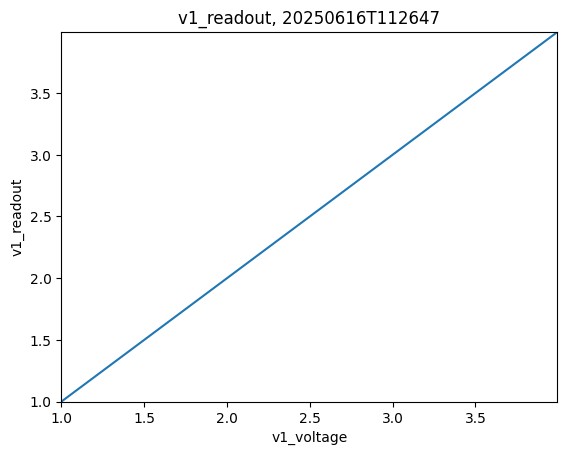

In [6]:
ps.live_plot1D(expt, data_name="v1_readout")

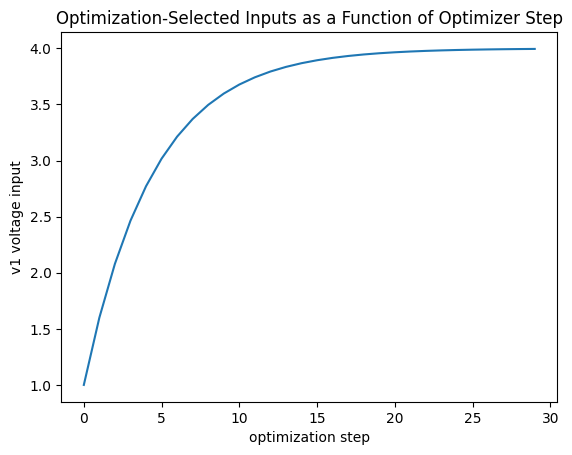

In [7]:
plt.plot(expt.v1_voltage)
plt.xlabel("optimization step")
plt.ylabel("v1 voltage input")
plt.title("Optimization-Selected Inputs as a Function of Optimizer Step");

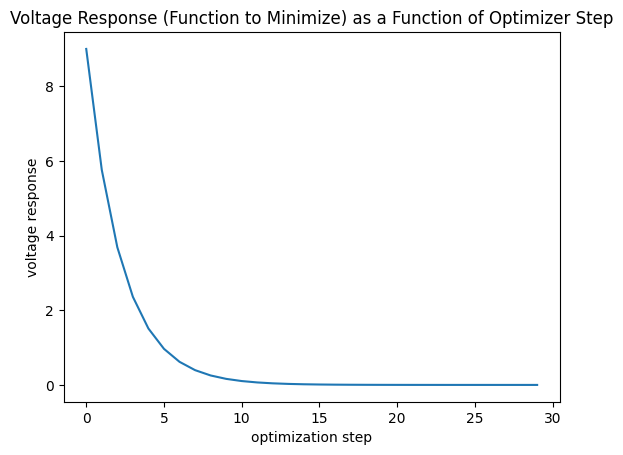

In [8]:
plt.plot(expt.vf)
plt.xlabel("optimization step")
plt.ylabel("voltage response")
plt.title("Voltage Response (Function to Minimize) as a Function of Optimizer Step");

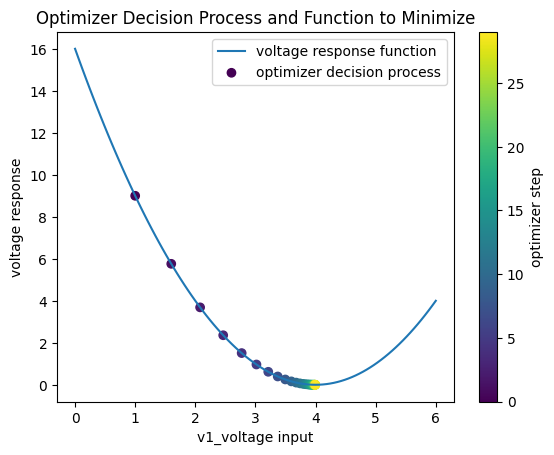

In [9]:
plt.plot(*zip(*[(v, voltage_response(v)) for v in np.linspace(0, 6, 100)]))
plt.scatter(expt.v1_voltage, expt.vf, c=range(len(expt.v1_voltage)))
plt.colorbar(label="optimizer step")
plt.legend(["voltage response function", "optimizer decision process"])
plt.xlabel("v1_voltage input")
plt.ylabel("voltage response")
plt.title("Optimizer Decision Process and Function to Minimize");